
<h1 style="color:DarkOliveGreen;"> Startup Business Profit Prediction </h1>

<h2 style="color:Peru;"> Importing Required Libraries </h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

<h2 style="color:Peru;"> Loading Dataset </h2>

In [2]:
df = pd.read_csv('./50_Startups.csv')

In [3]:
# lets check the first five rows of dataset
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
# summary statistics
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


<h3 style="color:green;"> Data Description </h3>

The data collected from New York, California and Florida about 50 business Startups. The independent variables used in this dataset are R&D spending, Administration and Marketing Spending.<br>
The dependent variable is Profit.

<h2 style="color:Peru;"> Exploratory Data Analysis </h2>

- Find Unwanted Columns
- Find Missing Values
- Find Features with one value
- Explore the Categorical Features
- Find Categorical Feature Distribution
- Relationship between Categorical Features and Label
- Explore the Numerical Features
- Find Discrete Numerical Features
- Relation between Discrete numerical Features and Labels
- Find Continous Numerical Features
- Distribution of Continous Numerical Features
- Relation between Continous numerical Features and Labels
- Find Outliers in numerical features
- Explore the Correlation between numerical features

**1. Find unwanted Columns**

**Insight**:
- There is no unwanted column present in given dataset to remove

**2. Find Missing Values**

In [6]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

**Insight**:
- No missing value found

**3. Find Features with one value**

In [7]:
feature_values = {col:df[col].nunique() for col in df.columns}
feature_values

{'R&D Spend': 49,
 'Administration': 50,
 'Marketing Spend': 48,
 'State': 3,
 'Profit': 50}

**Insight**:
- no feature found with one value

**4. Explore the Categorical Features**

In [8]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['State']

**Insight**:
- only one feature that is State is categorical and it has 3 unique values.

**5. Find Categorical Feature Distribution**

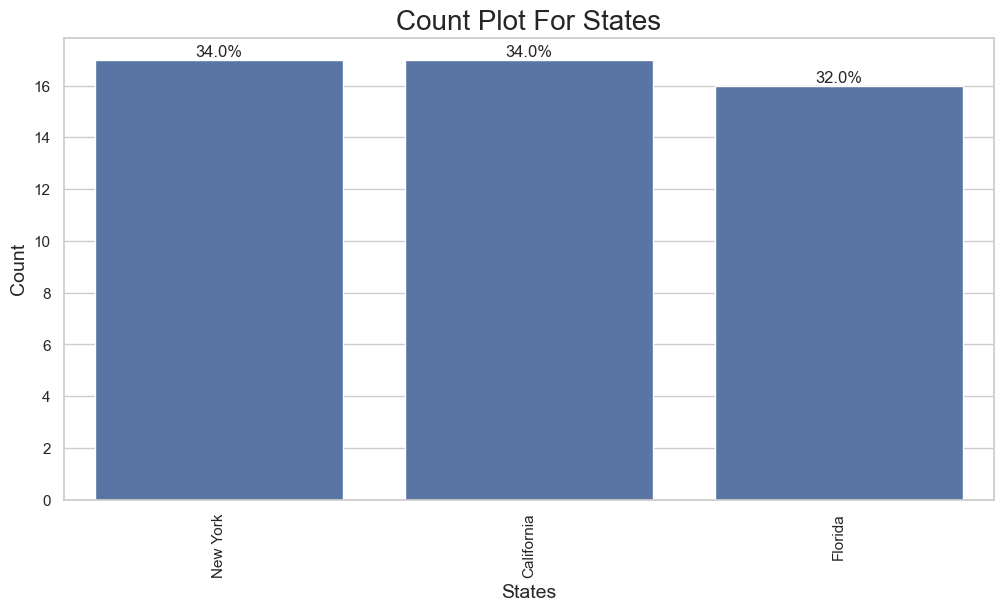

In [9]:
#check count based on categorical features
#It shows how many startups belong to each state, helping to
#understand the geographical distribution of startups in the dataset.
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
total = float(len(df))
ax = sns.countplot(x="State", data=df)
plt.xticks(rotation=90)
plt.title("Count Plot For States", fontsize=20)
plt.xlabel("States", fontsize=14)  # Add x-axis label
plt.ylabel("Count", fontsize=14)   # Add y-axis label

# Adding percentages to the bars
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()



**Insight**:
- State with florida has less number of records in given dataset.

**6. Relationship between Categorical Features and Label**

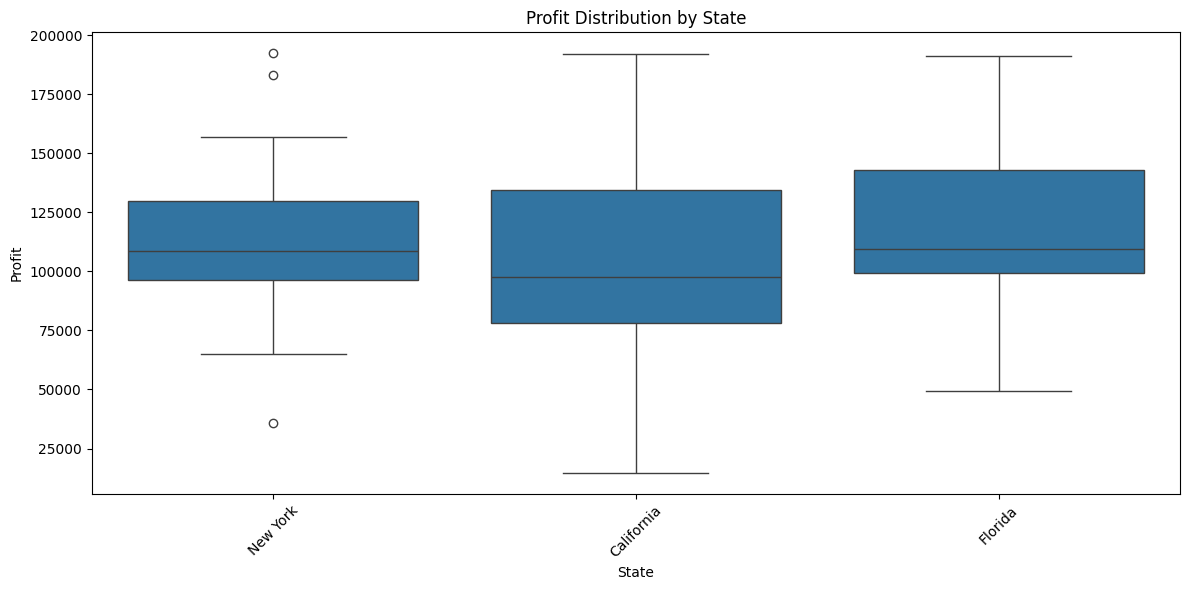

In [3]:
#Find out the relationship between categorical variable and dependent varaible
'''plt.figure(figsize=(12, 6))
fig = sns.boxplot(x='State', y="Profit", data=df.sort_values('Profit',ascending=False))
plt.show()'''
import matplotlib.pyplot as plt
import seaborn as sns

# Reload data if needed
import pandas as pd
df = pd.read_csv("50_Startups.csv")
import os
os.getcwd()

# Create boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='State', y='Profit', data=df.sort_values('Profit', ascending=False))
plt.title("Profit Distribution by State")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**Insight**:
- It seems startup in state of California has less profits than others two states.

**7. Explore the Numerical Features**

In [4]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['Profit']))]
print('Numerical variables: ', numerical_features)

Numerical variables:  ['R&D Spend', 'Administration', 'Marketing Spend']


**Insight**:
- there are three numerical features that are R&D Spend, Administration and Marketing Spend.

**8. Find Discrete Numerical Features**

In [5]:
discrete_feature = [feature for feature in numerical_features if df[feature].nunique()<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


**Insight**:
- no discrete variable found

**9. Find Continous Numerical Features**

In [6]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_feature + ['Profit']]
continuous_features

['R&D Spend', 'Administration', 'Marketing Spend']

**Insight**:
- there are three continuous numerical features - 'R&D Spend', 'Administration', 'Marketing Spend'

**10. Distribution of Continous Numerical Features**

C:\Users\Ramya\AppData\Local\Temp\ipykernel_11452\769749724.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],ax=axes[i])
C:\Users\Ramya\AppData\Local\Temp\ipykernel_11452\769749724.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],ax=axes[i])
C:\Users\Ramya\AppData\Local\T

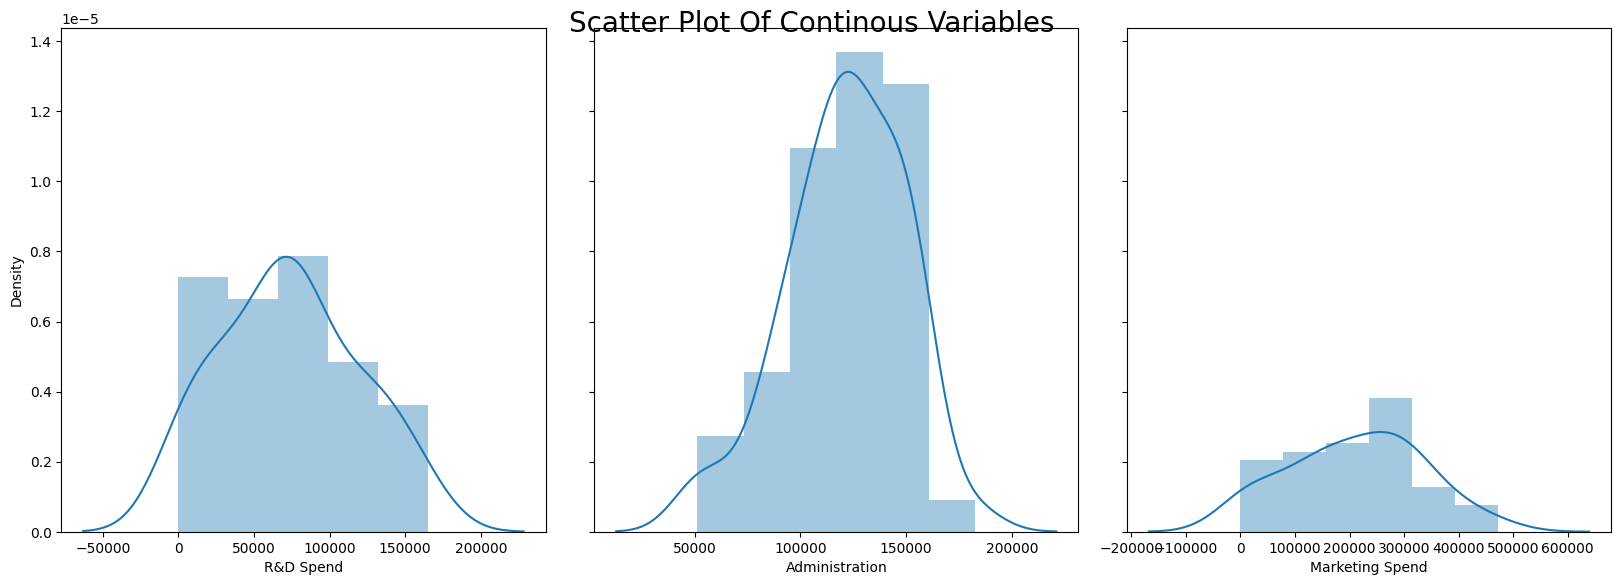

In [7]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
fig,axes = plt.subplots(1,3,figsize=(20,6),sharey=True)
fig.subplots_adjust(wspace=0.1, hspace=0.3)
fig.suptitle('Scatter Plot Of Continous Variables',fontsize = 20)
fig.subplots_adjust(top=0.95)

axes = axes.ravel()

for i,col in enumerate(continuous_features):
    #using log transformation
    sns.distplot(df[col],ax=axes[i])

**Insight**:
- it seems all continuous features are normally distributed.

**11. Relation between Continuous numerical Features and Labels**

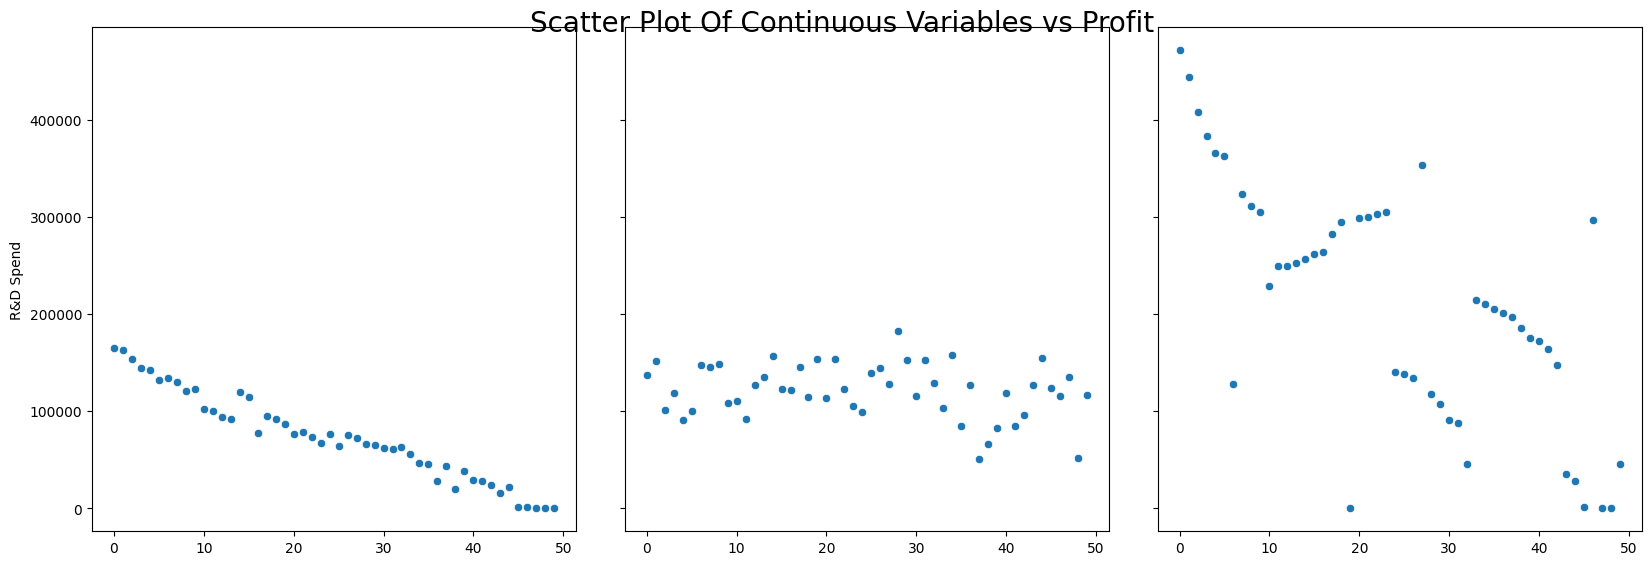

In [8]:
fig,axes = plt.subplots(1,3,figsize=(20,6),sharey=True)
fig.subplots_adjust(wspace=0.1, hspace=0.3)
fig.suptitle('Scatter Plot Of Continuous Variables vs Profit',fontsize = 20)
fig.subplots_adjust(top=0.95)

axes = axes.ravel()

for i,col in enumerate(continuous_features):
    x = df[col]
    y = df['Profit']
    sns.scatterplot(x,ax=axes[i])

**Insight**:
- it seems R&D Spend and Marketing Spend features linearly progressing with Profit.

**12. Find Outliers in numerical features**

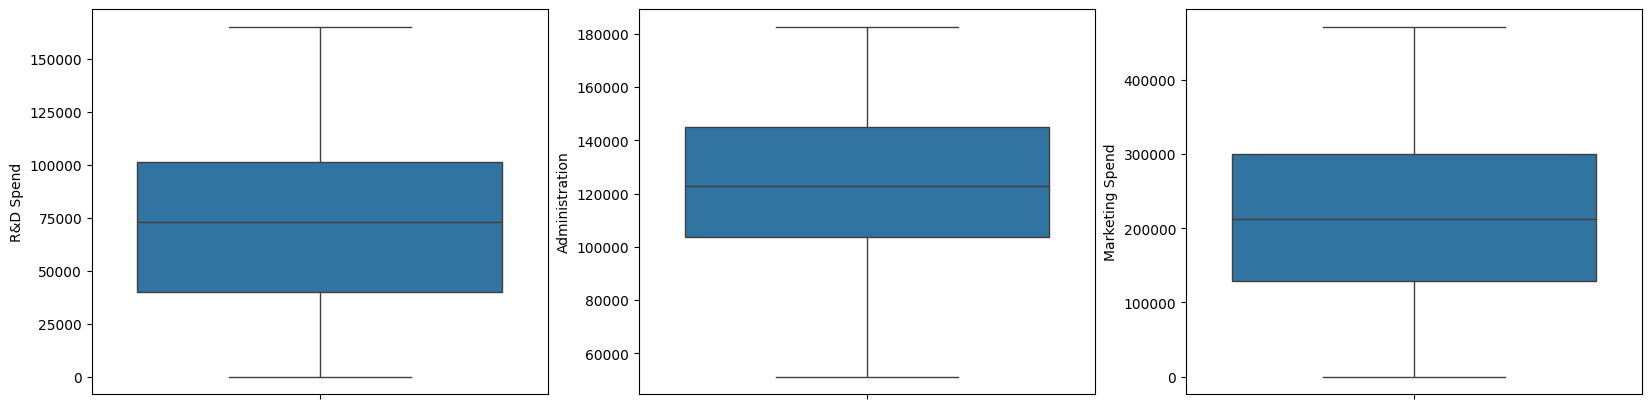

In [9]:
#boxplot on numerical features to find outliers
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
for variable, subplot in zip(numerical_features, ax.flatten()):
    sns.boxplot(df[variable], ax=subplot)

**Insight**:
- it seems no outliers found

**13. Explore the Correlation between numerical features**

C:\Users\Ramya\AppData\Local\Temp\ipykernel_11452\3704188851.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='plasma')


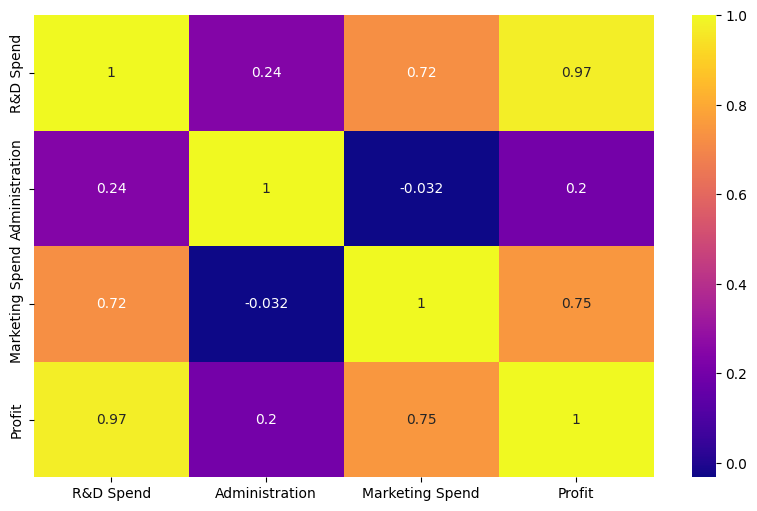

In [10]:
# Checking for correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='plasma')
plt.show()

**Insight**:
- it seems R&D Spend and marketing spend is correlated.

<h2 style="color:Peru;"> Feature Engineering </h2>

- Drop unwanted Features
- Handle Missing Values
- Handle Categorical Features
- Handle Feature Scalling
- Remove Outliers

**As per Exploratory Data Analysis EDA**, 
- There is no unwanted column present in given dataset to remove
- No missing value found
- Only one feature that is State is categorical and it has 3 unique values
- No outliers found

In [11]:
# Handling Categorical Features
df_state_dummies = pd.get_dummies(df['State'],prefix='state',drop_first=True)
# concat df and state dummies
df = pd.concat([df,df_state_dummies],axis=1)

In [12]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,state_Florida,state_New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,1
1,162597.70,151377.59,443898.53,California,191792.06,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,1,0


In [13]:
# drop the original categorical columns
df.drop(['State'], axis=1, inplace=True)

In [14]:
df.shape

(50, 6)

<h2 style="color:Peru;"> Model Selection </h2>

In [15]:
# Separate Dependent and Independent Variables
X = df.drop('Profit',axis=1)
y = df['Profit']

In [16]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

In [17]:
# Hyper parameter tuning
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'LinearRegression': {
            'model': make_pipeline(StandardScaler(), LinearRegression()),
            'params': {
                'linearregression__fit_intercept': [True, False],
                'linearregression__copy_X': [True, False]
            }
        },
        'Lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'DecisionTree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error'],  # Fewer values
                'splitter': ['best']
            }
        },
        'RandomForest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [100, 200],  # Fewer values
                'max_features': ['auto', 'sqrt'],
                'max_depth': [10, 20],  # Fewer values
                'min_samples_leaf': [1]
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=50)  # Reduced splits for faster computation
    for algo_name, config in algos.items():
        gs = RandomizedSearchCV(config['model'], config['params'], cv=cv, n_iter=5, n_jobs=-1, return_train_score=False)  # Using RandomizedSearchCV with limited iterations
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])




In [18]:
df = pd.read_csv('./50_Startups.csv')
print(df.head())

# Preprocessing categorical 'State' column (if necessary)
# Check if 'State' column exists in df before applying get_dummies
if 'State' in df.columns:
    df = pd.get_dummies(df, columns=['State'], drop_first=True)
else:
    print("'State' column not found in the dataset")

# Define features and target
X = df.drop('Profit', axis=1)
y = df['Profit']

# Now you can proceed with the GridSearchCV function
pd.set_option('display.max_colwidth', 100)
best_models = find_best_model_using_gridsearchcv(X, y)


   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


c:\Users\Ramya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\Ramya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\Ramya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\Ramya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
6 fits failed out of a total of 15.
The score on these train-test part

<h2 style="color:Peru;"> Model Building </h2>

In [23]:
# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Load your dataset
df = pd.read_csv('./50_Startups.csv')

# Preprocessing: One-hot encoding for categorical variables
if 'State' in df.columns:
    df = pd.get_dummies(df, columns=['State'], drop_first=True)

# Define features and target
X = df.drop('Profit', axis=1)
y = df['Profit']

# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with StandardScaler and LinearRegression
lr = make_pipeline(StandardScaler(), LinearRegression(copy_X=True, fit_intercept=True))

# Fit the model on the training data
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Evaluate the model
score = lr.score(X_test, y_test)
print("Model Score on Test Data (R^2):", score)
print("Predicted Values on Test Data:", y_pred)
print("Actual Values on Test Data:", y_test.values)


Model Score on Test Data (R^2): 0.8987266414319839
Predicted Values on Test Data: [126362.87908252  84608.45383643  99677.49425155  46357.46068582
 128750.48288497  50912.41741905 109741.350327   100643.24281644
  97599.275746   113097.42524437]
Actual Values on Test Data: [134307.35  81005.76  99937.59  64926.08 125370.37  35673.41 105733.54
 107404.34  97427.84 122776.86]


In [24]:
# fit the model
lr.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [25]:
# checking score on test data
lr.score(X_test,y_test)

0.9179169317954439

In [26]:
# predict on test data 
y_pred= lr.predict(X_test)

<h2 style="color:Peru;"> Prediction </h2>

In [27]:
def predict_profit(r_d_expenses, administration_expenses, marketing_expenses, state):    
    '''
    predict profit function takes four arguments and 
    converts the data into the required format for prediction. 
    '''
    
    # Create a feature array initialized to zero
    x = np.zeros(len(X.columns))
    x[0] = r_d_expenses
    x[1] = administration_expenses
    x[2] = marketing_expenses
    
    # Find the state index
    state_column = 'State_' + str(state)  # Adjusting column name to match what get_dummies would produce
    
    if state_column in X.columns:
        state_index = np.where(X.columns == state_column)[0][0]
        x[state_index] = 1
    else:
        raise ValueError(f"State '{state}' is not recognized. Available states: {list(X.columns)}")

    # Make prediction
    return lr.predict([x])[0]

# Example prediction call
try:
    predicted_profit = predict_profit(55067.95, 102077.25, 212117.91, 'New York')
    print("Predicted Profit:", predicted_profit)
except Exception as e:
    print("Error:", e)


Predicted Profit: 97435.88239192597


c:\Users\Ramya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


<h2 style="color:Peru;"> Save Model </h2>

In [28]:
import pickle
# save the model for future use 
pickle.dump(lr,open('startp_profit_prediction_lr_model.pkl','wb'))

In [29]:
#save the data columns
import json

columns = {'data_columns' : [col.lower() for col in X.columns]}

with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [31]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE  # For handling class imbalance
import xgboost as xgb  # XGBoost for boosting model
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = pd.read_csv('./50_Startups.csv')

# Step 2: Preprocess Data
def preprocess_data(data):
    # Handle missing values (Impute or Drop)
    data.fillna(data.mean(), inplace=True)  # Fill missing values with mean
    
    # Encode categorical variables (State)
    data = pd.get_dummies(data, drop_first=True)  # One-hot encoding
    
    return data

# Preprocess the data
data = preprocess_data(data)

# Step 3: Define Features (X) and Target (y)
X = data.drop('Profit', axis=1)  # Ensure 'Profit' is the correct column representing profitability
y = data['Profit']

# Check the distribution of the target variable y
print("Distribution of the target variable (Profit):")
print(y.value_counts())

# Check for missing values in the features
print("Missing values in features:")
print(X.isnull().sum())

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for missing values in training data
print("Missing values in X_train:")
print(X_train.isnull().sum())

# Check data types of the features
print("Data types in X_train:")
print(X_train.dtypes)

# Check unique values in target variable
print("Unique values in y_train:")
print(y_train.unique())

# Step 5: Handling Class Imbalance Using SMOTE on training data only
# Check that no missing values exist in X_train before applying SMOTE
print("Checking for missing values before SMOTE...")
if X_train.isnull().values.any():
    print("X_train contains missing values!")
else:
    # Apply SMOTE only if there are no missing values
    smote = SMOTE(random_state=42)
    
    try:
        X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
        print("SMOTE applied successfully.")
    except ValueError as e:
        print("Error while applying SMOTE:", e)

# If SMOTE was successful, proceed with scaling
if 'X_train_smote' in locals():
    # Step 6: Scaling Features
    scaler = StandardScaler()
    X_train_smote = scaler.fit_transform(X_train_smote)
    X_test = scaler.transform(X_test)

    # Step 7: Define Models for Stacking
    rf_model = RandomForestClassifier(random_state=42)
    svm_model = SVC(probability=True, random_state=42)
    mlp_model = MLPClassifier(random_state=42)

    # XGBoost model
    xgboost_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

    # Base models for stacking
    estimators = [
        ('rf', rf_model),
        ('svm', svm_model),
        ('mlp', mlp_model)
    ]

    # Define Stacking Model with XGBoost as the final classifier
    stacking_model = StackingClassifier(
        estimators=estimators,
        final_estimator=xgboost_model,
        cv=5
    )

    # Step 8: Hyperparameter Tuning for XGBoost using GridSearchCV
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0]
    }

    grid_search = GridSearchCV(estimator=xgboost_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
    grid_search.fit(X_train_smote, y_train_smote)

    # Best parameters from Grid Search
    best_params = grid_search.best_params_
    print(f'Best Hyperparameters for XGBoost: {best_params}')

    # Train Stacking Model with Optimized XGBoost
    stacking_model.fit(X_train_smote, y_train_smote)

    # Step 9: Model Evaluation
    y_pred = stacking_model.predict(X_test)

    # Evaluate the model performance
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')
    print(f'ROC-AUC Score: {roc_auc}')
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Step 10: Cross-Validation to Ensure Generalization
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(stacking_model, X_train_smote, y_train_smote, cv=cv, scoring='accuracy')
    print(f'Cross-Validation Accuracy Scores: {cv_scores}')
    print(f'Mean Cross-Validation Accuracy: {np.mean(cv_scores)}')



Distribution of the target variable (Profit):
192261.83    1
89949.14     1
105008.31    1
103282.38    1
101004.64    1
99937.59     1
97483.56     1
97427.84     1
96778.92     1
96712.80     1
96479.51     1
90708.19     1
81229.06     1
191792.06    1
81005.76     1
78239.91     1
77798.83     1
71498.49     1
69758.98     1
65200.33     1
64926.08     1
49490.75     1
42559.73     1
35673.41     1
105733.54    1
107404.34    1
108552.04    1
108733.99    1
191050.39    1
182901.99    1
166187.94    1
156991.12    1
156122.51    1
155752.60    1
152211.77    1
149759.96    1
146121.95    1
144259.40    1
141585.52    1
134307.35    1
132602.65    1
129917.04    1
126992.93    1
125370.37    1
124266.90    1
122776.86    1
118474.03    1
111313.02    1
110352.25    1
14681.40     1
Name: Profit, dtype: int64
Missing values in features:
R&D Spend          0
Administration     0
Marketing Spend    0
State_Florida      0
State_New York     0
dtype: int64
Missing values in X_train:
R&D 

C:\Users\Ramya\AppData\Local\Temp\ipykernel_11452\935359680.py:21: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)  # Fill missing values with mean


C:\Users\Ramya\AppData\Local\Temp\ipykernel_11452\3196725715.py:15: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)  # Fill missing values with mean


Missing values in X_train:
R&D Spend          0
Administration     0
Marketing Spend    0
State_Florida      0
State_New York     0
dtype: int64
Mean Absolute Error: 6129.244519999981
Mean Squared Error: 70520613.36591527
R² Score: 0.9129151597594712


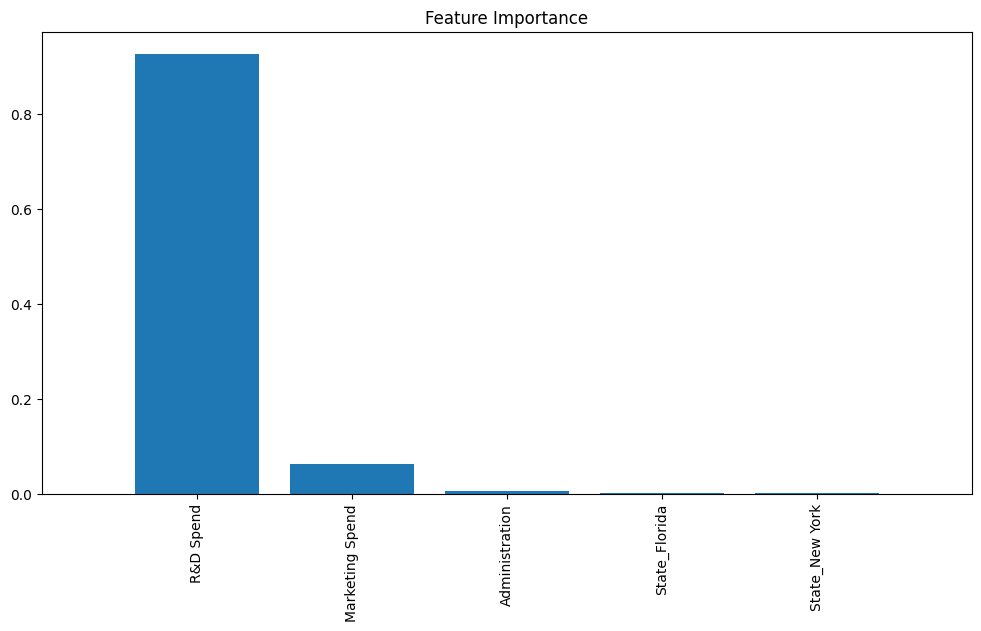

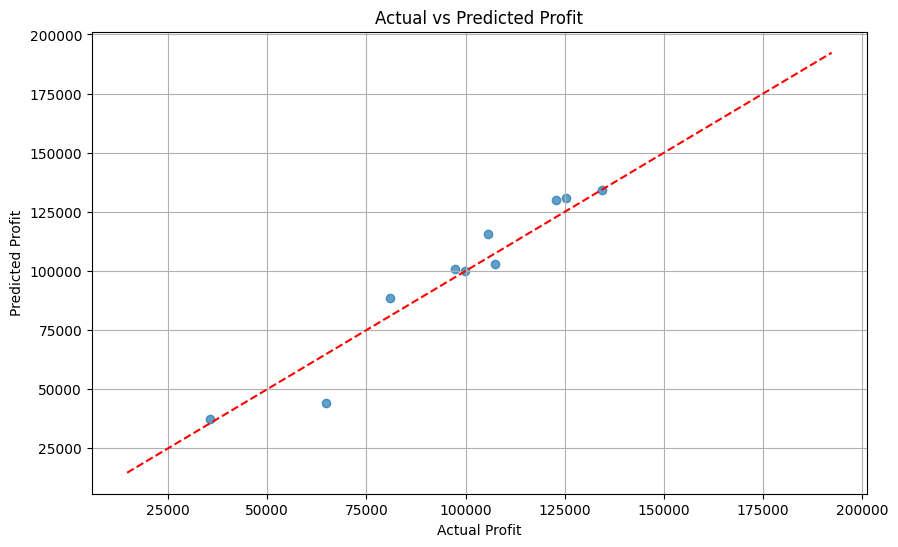

In [32]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('./50_Startups.csv')

# Preprocess Data
def preprocess_data(data):
    data.fillna(data.mean(), inplace=True)  # Fill missing values with mean
    data = pd.get_dummies(data, drop_first=True)  # One-hot encoding
    return data

data = preprocess_data(data)

# Define Features (X) and Target (y)
X = data.drop('Profit', axis=1)
y = data['Profit']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for missing values in training data
print("Missing values in X_train:")
print(X_train.isnull().sum())

# Fit Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
}

# Perform grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Make predictions
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# Feature Importance Plot
plt.figure(figsize=(12, 6))
importance = best_rf_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importance)[::-1]

plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importance[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# Actual vs Predicted Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Line of perfect prediction
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Actual vs Predicted Profit')
plt.grid()
plt.show()
